In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# Load full dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Select only the first 5 classes
keep_classes = [0, 1, 2, 3, 4]

# FILTER TRAIN
train_mask = np.isin(y_train, keep_classes)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

# FILTER TEST
test_mask = np.isin(y_test, keep_classes)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# Flatten images
X_train_flat = X_train.reshape(-1, 784) / 255.0
X_test_flat = X_test.reshape(-1, 784) / 255.0

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (30000, 28, 28)
Test size: (5000, 28, 28)


In [2]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver="saga",
    multi_class="multinomial"
)

log_reg.fit(X_train_flat, y_train)

y_pred_lr = log_reg.predict(X_test_flat)

acc_lr_train = accuracy_score(y_train, log_reg.predict(X_train_flat))
acc_lr_test = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Train Accuracy:", acc_lr_train)
print("Logistic Regression Test Accuracy:", acc_lr_test)


c:\Users\TOP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Train Accuracy: 0.9105666666666666
Logistic Regression Test Accuracy: 0.8708


In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_flat)

clusters = kmeans.predict(X_test_flat)

# Map cluster → class using train labels
label_map = {}

for cluster in range(5):
    labels = y_train[kmeans.labels_ == cluster]
    if len(labels) > 0:
        label_map[cluster] = np.bincount(labels).argmax()
    else:
        label_map[cluster] = 0

y_pred_kmeans = np.array([label_map[c] for c in clusters])

acc_kmeans = accuracy_score(y_test, y_pred_kmeans)

print("\nK-Means Test Accuracy:", acc_kmeans)



K-Means Test Accuracy: 0.5898


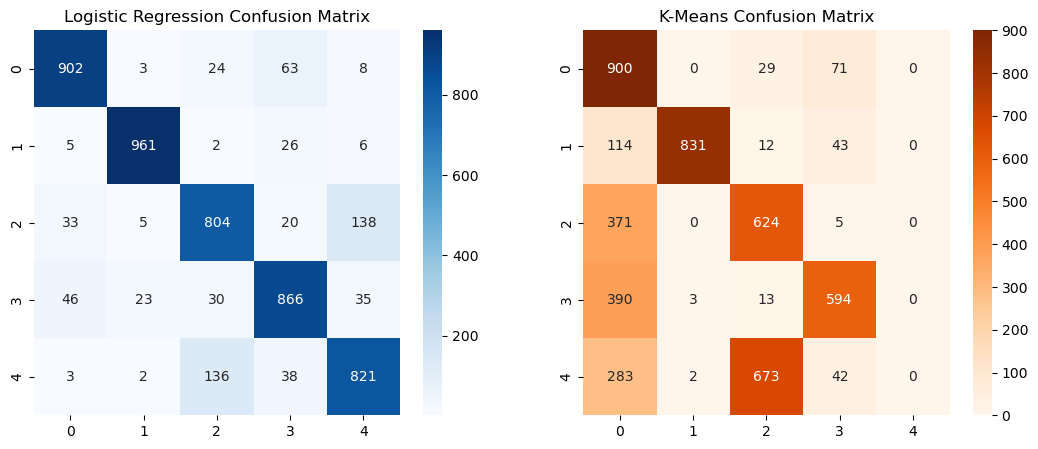

In [5]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            cmap="Blues", annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_kmeans),
            cmap="Oranges", annot=True, fmt="d")
plt.title("K-Means Confusion Matrix")

plt.show()


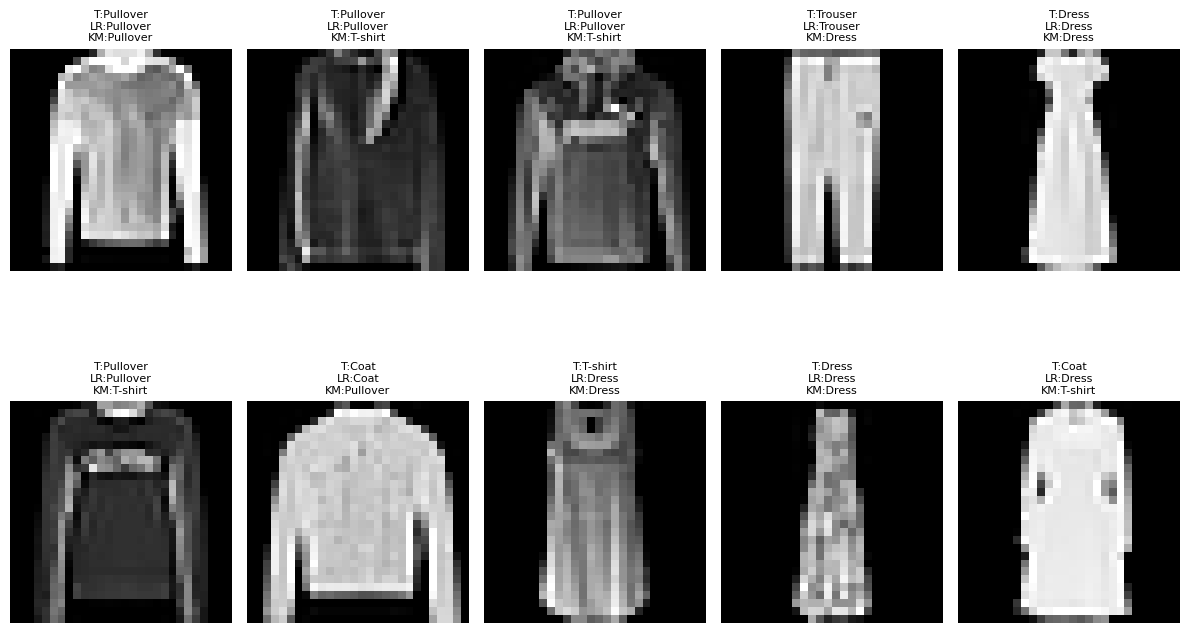

In [6]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat"]

plt.figure(figsize=(12,8))

for i in range(10):
    idx = np.random.randint(0, len(X_test))

    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')

    true_lbl = class_names[y_test[idx]]
    lr_lbl = class_names[y_pred_lr[idx]]
    km_lbl = class_names[y_pred_kmeans[idx]]

    plt.title(f"T:{true_lbl}\nLR:{lr_lbl}\nKM:{km_lbl}", fontsize=8)

plt.tight_layout()
plt.show()
